This is to visualization a project made in Tableau in python. 

This visualization is about the gender inequality in Ghana parliament - a collabration viz with Lawer Akrofi. The data was sourced Wikipedia and an extensive cleaning done in python. 

##    A REPORT ON GENDER INEQUALITY IN GHANA'S PARLIAMENT 

The female voice has yet to be fully heard in Ghana's parliament since independence. In 1954, Mabel Dove Danquah, a journalist, became the first female elected to parliament when she won the Ga Rural seat, beating her male oponnent Nii Amaa Ollennu. After this historic moment in Ghana's political history, the next parliament, unfortunately, did not see any female representation. In subsequent years, the cry for more women in power has led to the gradual increase in numbers of elected female parliamentarians. In terms of leadership positions, Ghana has appointed only one woman, Joyce Adeline Bamford-Addo, to be the speaker of parliament between 2009-2013. 

In [8]:
#importing the needed libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


<img src="Inequality in Ghana's Parliament (2).png" width="500"/>

In [9]:
#loading in the files 

Gh_par = pd.read_csv("Ghana Parliament.csv")
Gh_par.head()

,Constituency,Elected MP,Elected Party,Region,Parliament,Gender,Year
0,Ashiedu Keteke,Kwame Nkrumah,CPP,Eastern,1951 Assembly,male,1951
1,Accra West,Thomas HuttonMills,CPP,Eastern,1951 Assembly,male,1951
2,Ankobra,John Bogolo Erzuah,CPP,Eastern,1951 Assembly,male,1951
3,Anlo,Komla Agbeli Gbedemah,CPP,Eastern,1951 Assembly,male,1951
4,Anlo,John Quarshie,CPP,Eastern,1951 Assembly,male,1951


In [10]:
#the pie chart or donut chart 
#let's slide the data to that of 7th parliament of the 4th republic  
'''parliament = ["7th Parliament", "6th Parliament", "5th Parliament", "4th Parliament", "3rd Parliament",
              "2nd Parliament", "1st Parliament", "1979 Parliament", "1969 Parliament", "1965 Parliament",
              "1957 Parliament", "1954 Assembly", "1951 Assembly"]'''
    
par_7 = Gh_par[Gh_par["Parliament"]== "7th Parliament"]
par_7.head()

,Constituency,Elected MP,Elected Party,Region,Parliament,Gender,Year
2000,Asunafo North,Evans Bobie Opoku,NPP,Ahafo,7th Parliament,male,2016
2001,Asunafo South,Eric Opoku,NDC,Ahafo,7th Parliament,male,2016
2002,Asutifi North,Benhazin Joseph Dahah,NPP,Ahafo,7th Parliament,male,2016
2003,Asutifi South,Collins Dauda,NDC,Ahafo,7th Parliament,male,2016
2004,Tano North,Freda Prempeh,NPP,Ahafo,7th Parliament,female,2016


In [11]:
#calculating the percetange of males to female

total = par_7["Gender"].count()

gender = par_7.groupby('Gender')["Gender"].count()

gen = ["female", "male"]

for i in gen:
    percent_gen = gender[i]/total *100
    if i == "male":
        percent_male = gender[i]/total *100
    else:
        percent_female = gender[i]/total *100

<IPython.core.display.Javascript object>


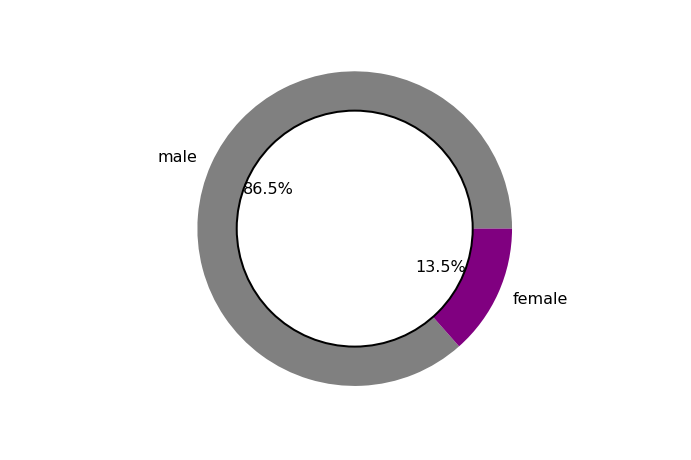

In [60]:
plt.pie(x = [percent_male, percent_female], explode = (0,0), 
        labels = ["male", "female"],colors = ["Grey", "purple"], autopct = '%1.1f%%', shadow = False)

centre_circle = plt.Circle((0,0), 0.75, color="black", fc="white", linewidth =1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis("equal")
plt.show()

In [145]:
Gh = Gh_par.groupby(['Gender', 'Year'])['Elected MP'].count().reset_index()
Gh = Gh.rename(columns= {'Elected MP': 'Number'})

<IPython.core.display.Javascript object>


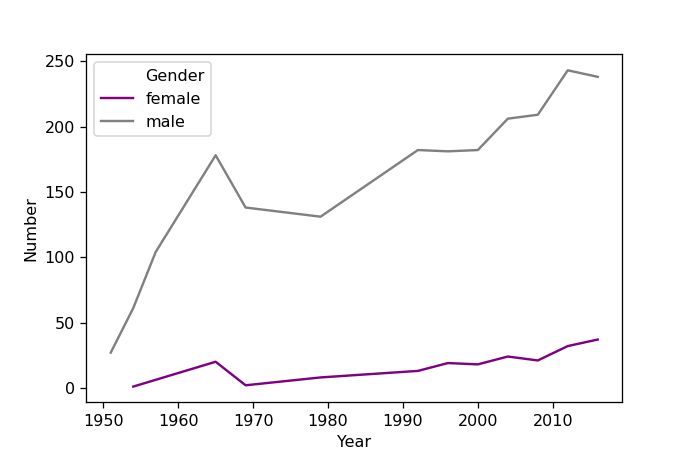

In [66]:
#plotting the timeseries 
#i tried using matplotlib but i think seaborn works better
#using seaborn
import seaborn as sns 
'''#trying to make seaborn interactive 
%matplotlib nbagg  '''

sns.lineplot(x = Gh.Year, y = Gh.Number, hue = Gh.Gender, palette = ['purple', 'Grey'])

In [144]:
#let's try plotly. This library is used to build intereactive visualization
import plotly.graph_objects as go

labels = ['male', 'female']
values = [percent_male, percent_female]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.7, marker_colors = ['grey', 'purple'])])
fig.show()

In [142]:
import plotly.express as px

fig = px.line(Gh, x="Year", y="Number", color='Gender', color_discrete_sequence=['purple', 'grey'])
fig.show()

In [95]:
#trying to replicate the waffle chart made in tableau in python

seventh_par = Gh_par[Gh_par['Parliament'] == '7th Parliament']
parties = seventh_par.groupby(['Elected Party', 'Gender'])['Elected MP'].count().reset_index()
NPP = parties[parties['Elected Party'] == 'NPP']
NDC = parties[parties['Elected Party'] == 'NDC']
NPP

,Elected Party,Gender,Elected MP
2,NPP,female,24
3,NPP,male,146


<IPython.core.display.Javascript object>


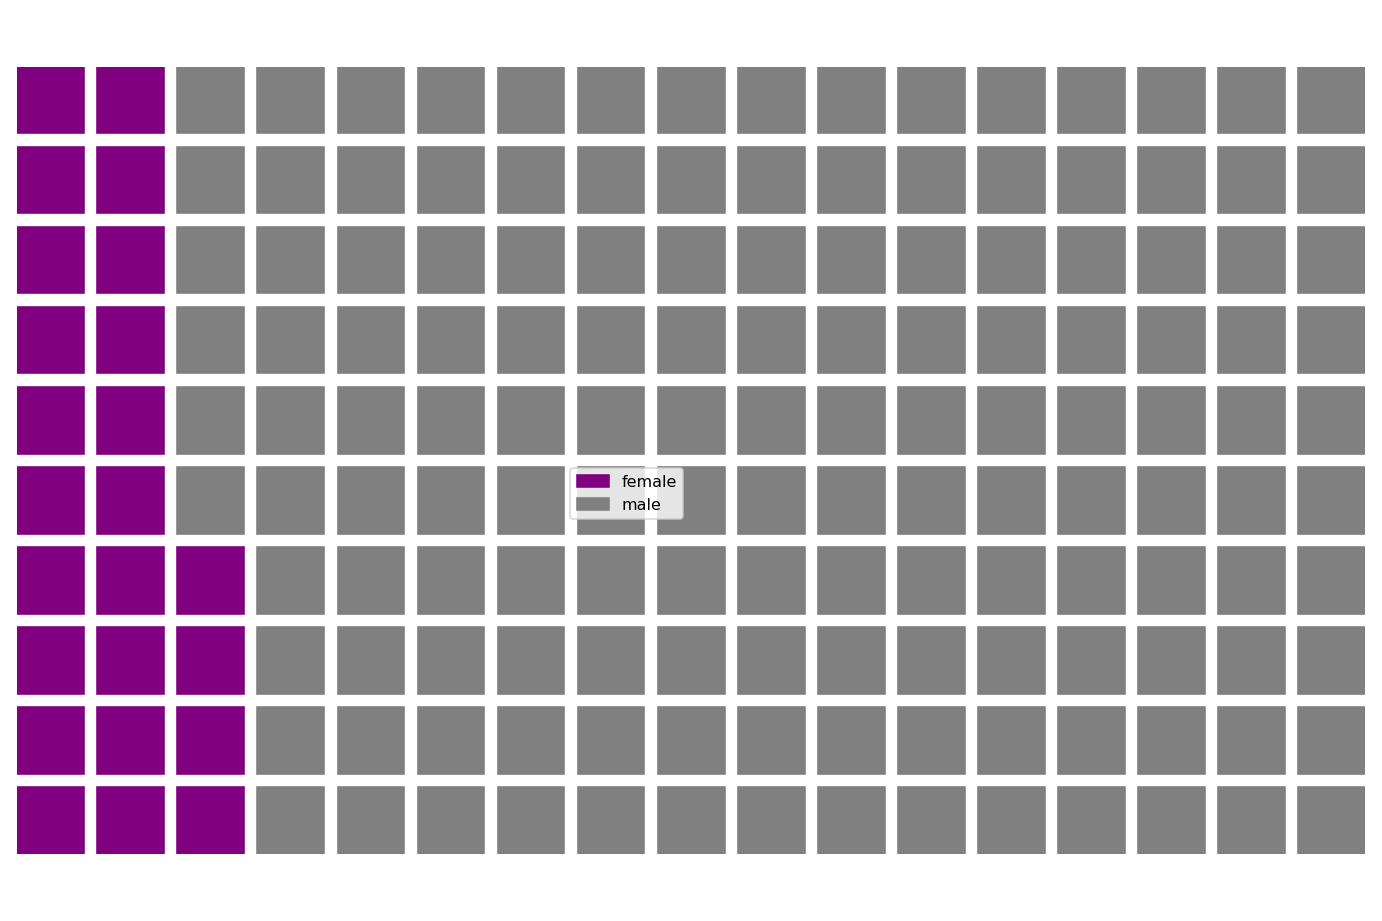

In [125]:
from pywaffle import Waffle 

fig_NPP = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=list(NPP['Elected MP']),
    labels=list(NPP['Gender']),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0.5, 0.5)},
    colors = ['purple', 'grey']
)

<IPython.core.display.Javascript object>


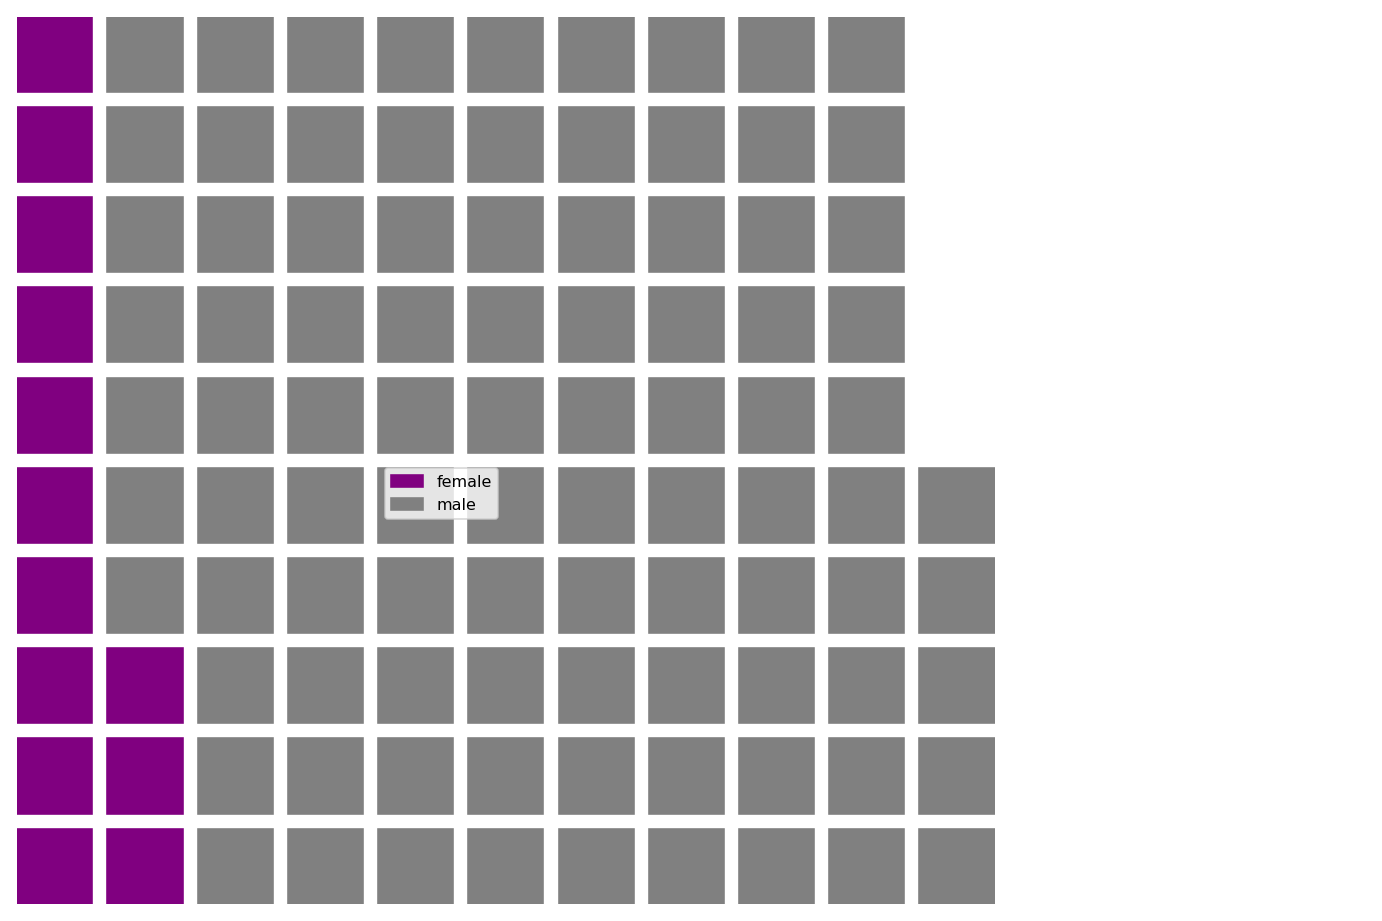

In [124]:
fig_NDC = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=list(NDC['Elected MP']),
    labels=list(NDC['Gender']),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0.5, 0.5)},
    colors = ['purple', 'grey']

)